# Univariate Resemblance Analysis (URA) Dataset C

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/RESEMBLANCE'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for univariate resemblance analisys
from univariate_resemblance import basic_stats
from univariate_resemblance import student_t_tests
from univariate_resemblance import mann_whitney_tests
from univariate_resemblance import ks_tests
from univariate_resemblance import chi_squared_tests
from univariate_resemblance import scale_data
from univariate_resemblance import euclidean_distances
from univariate_resemblance import cosine_distances
from univariate_resemblance import js_distances
from univariate_resemblance import wass_distances

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/C_Obesity_Data_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/C_Obesity_Data_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/C_Obesity_Data_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/C_Obesity_Data_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/C_Obesity_Data_Synthetic_WGANGP.csv'}
categorical_columns = ['Gender','family_history_with_overweight','FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','Obesity_level']
data = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category')
    if name == 'WGANGP' :
        data[name] = data[name][0:len(data['Real'])]
data

{'Real':       Gender  Age  Height  Weight family_history_with_overweight FAVC  \
 0     Female   21    1.63   60.00                            yes  yes   
 1     Female   21    1.75  133.62                            yes  yes   
 2     Female   23    1.66   82.60                            yes  yes   
 3     Female   22    1.59   44.24                             no   no   
 4       Male   26    1.81  106.04                            yes  yes   
 ...      ...  ...     ...     ...                            ...  ...   
 1683    Male   32    1.75  120.10                            yes  yes   
 1684    Male   23    1.72   81.67                            yes  yes   
 1685  Female   23    1.65   80.00                            yes  yes   
 1686  Female   23    1.63   84.50                            yes  yes   
 1687    Male   20    1.82   85.00                            yes  yes   
 
           FCVC       NCP        CAEC SMOKE      CH2O SCC       FAF       TUE  \
 0     3.000000  3.00

## 2. Basic statistics comparisson
In this part the basic statistics of each attribute for each dataset are computed.
- means and stds of all variables are compared.

In [5]:
df_means_std = pd.DataFrame(index=data['Real'].select_dtypes(include=['float64','int64']).columns.tolist())
for name in DATA_TYPES :
    means_stds = basic_stats(data[name])
    means_stds.columns = [name]
    df_means_std = pd.concat([df_means_std,means_stds], axis=1)
df_means_std

,Real,GM,SDV,CTGAN,WGANGP
Age,24.45 ± 6.49,23.9 ± 6.59,24.63 ± 6.48,24.24 ± 7.99,27.25 ± 3.23
Height,NaN,NaN,NaN,NaN,NaN
Weight,NaN,NaN,NaN,NaN,NaN
FCVC,NaN,NaN,NaN,NaN,NaN
NCP,NaN,NaN,NaN,NaN,NaN
CH2O,NaN,NaN,NaN,NaN,NaN
FAF,NaN,NaN,NaN,NaN,NaN
TUE,NaN,NaN,NaN,NaN,NaN


## 3. Statistical Tests
In this part some statistical tests are performed to compare variables from real and synthetic data.

### 3.1. Sudent t-test
- null hypothesis (p > 0.05): Means of real and synthetic feature are the same.
- alternative hypothesis (p < 0.05): Mean of real and synthetic feature are significantly different.

In [6]:
p_values_student = dict()
for name in SYNTHESIZERS :
    p_values_student[name] = student_t_tests(data['Real'], data[name])
df_student_test = pd.DataFrame(data=p_values_student, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_student_test.to_csv('UNIVARIATE RESEMBLANCE RESULTS/student_t_tests.csv')
df_student_test

,GM,SDV,CTGAN,WGANGP
Age,0.0156,0.4060,4.0935e-01,9.1173e-55
Height,0.6270,0.6606,1.4845e-142,2.6668e-86
Weight,0.4547,0.8357,5.7190e-149,3.9646e-96
FCVC,0.6125,0.6637,1.1866e-01,7.5086e-17
NCP,0.6443,0.7710,1.6827e-01,9.2528e-02
CH2O,0.1596,0.5299,2.7835e-56,9.6365e-20
FAF,0.7826,0.6126,8.7781e-18,9.0960e-02
TUE,0.7928,0.8725,5.0760e-03,9.4930e-30


### 3.2. Mann-Whitney U-Test
- null hypothesis (p > 0.05): Real feature and synthetic feature come from the same population.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature does not come from the same population.

In [7]:
p_values_mann_whitnney = dict()
for name in SYNTHESIZERS :
    p_values_mann_whitnney[name] = mann_whitney_tests(data['Real'], data[name])
df_mann_whitney = pd.DataFrame(data=p_values_mann_whitnney, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_mann_whitney.to_csv('UNIVARIATE RESEMBLANCE RESULTS/mann_whitnney_tests.csv')
df_mann_whitney

,GM,SDV,CTGAN,WGANGP
Age,0.0015,1.6487e-06,3.5508e-06,3.3209e-105
Height,0.2792,3.0776e-01,1.9825e-126,7.9059e-67
Weight,0.2052,1.9296e-01,1.6602e-138,2.3052e-78
FCVC,0.2359,2.9049e-01,2.3490e-02,8.6214e-04
NCP,0.0715,5.2034e-05,3.0584e-18,2.1153e-105
CH2O,0.0538,3.9393e-01,1.3938e-73,5.4666e-32
FAF,0.0209,4.5051e-02,1.2170e-29,3.9194e-04
TUE,0.0183,6.8447e-02,2.6193e-01,1.0110e-40


### 3.3. Kolmogorov-Smirnov Test
- null hypothesis (p > 0.05): Real feature and synthetic feature distributions are equal.
- alternative hypothesis (p < 0.05): Real feature and synthetic feature distributions are not equal.

In [8]:
p_values_ks = dict()
for name in SYNTHESIZERS :
    p_values_ks[name] = ks_tests(data['Real'], data[name])
df_ks = pd.DataFrame(data=p_values_ks, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns)
df_ks.to_csv('UNIVARIATE RESEMBLANCE RESULTS/ks_tests.csv')
df_ks

,GM,SDV,CTGAN,WGANGP
Age,7.6323e-05,4.1669e-20,3.2080e-06,1.9973e-133
Height,7.7999e-02,1.1913e-01,1.0743e-96,2.5555e-164
Weight,1.6362e-01,6.7518e-03,1.1077e-104,4.8406e-149
FCVC,5.1999e-24,1.0691e-23,1.6469e-02,2.4663e-82
NCP,2.6536e-67,3.4428e-87,1.0238e-139,5.3912e-320
CH2O,1.1490e-15,1.7872e-11,2.1391e-118,2.8975e-132
FAF,3.1540e-10,9.9118e-10,1.5203e-55,1.5203e-55
TUE,8.5939e-16,2.0466e-15,4.0149e-25,1.1860e-68


### 3.4. Join all p-values of all tests in one unique dataset

In [9]:
tests_all_data = np.round(np.concatenate([df_student_test.values, df_mann_whitney.values, df_ks.values] , axis=1),4)
#join results of all tests
df_tests_all = pd.DataFrame(data=tests_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_S','SDV_S','CTGAN_S','WGANGP_S','GM_M','SDV_M','CTGAN_M','WGANGP_M','GM_K','SDV_K','CTGAN_K','WGANGP_K'])
df_tests_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/STATISTICAL_TESTS_ALL.csv')
df_tests_all

,GM_S,SDV_S,CTGAN_S,WGANGP_S,GM_M,SDV_M,CTGAN_M,WGANGP_M,GM_K,SDV_K,CTGAN_K,WGANGP_K
Age,0.0156,0.4060,0.4093,0.0000,0.0015,0.0000,0.0000,0.0000,0.0001,0.0000,0.0000,0.0
Height,0.6270,0.6606,0.0000,0.0000,0.2792,0.3078,0.0000,0.0000,0.0780,0.1191,0.0000,0.0
Weight,0.4547,0.8357,0.0000,0.0000,0.2052,0.1930,0.0000,0.0000,0.1636,0.0068,0.0000,0.0
FCVC,0.6125,0.6637,0.1187,0.0000,0.2359,0.2905,0.0235,0.0009,0.0000,0.0000,0.0165,0.0
NCP,0.6443,0.7710,0.1683,0.0925,0.0715,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
CH2O,0.1596,0.5299,0.0000,0.0000,0.0538,0.3939,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
FAF,0.7826,0.6126,0.0000,0.0910,0.0209,0.0451,0.0000,0.0004,0.0000,0.0000,0.0000,0.0
TUE,0.7928,0.8725,0.0051,0.0000,0.0183,0.0684,0.2619,0.0000,0.0000,0.0000,0.0000,0.0


### 3.4. Chi-Squared Test (categorical variables)
- null hypothesis (p > 0.05): There is not statistical relationship between real and synthetic feature.
- alternative hypothesis (p < 0.05): There is a statistical relationship between real and synthetic feature.

In [10]:
p_values_chi = dict()
for name in SYNTHESIZERS :
    p_values_chi[name] = chi_squared_tests(data['Real'], data[name])
df_chi = pd.DataFrame(data=p_values_chi, index=(data['Real'].select_dtypes(include=['category'])).columns)
df_chi.to_csv('UNIVARIATE RESEMBLANCE RESULTS/chi_squared_tests.csv')
df_chi

,GM,SDV,CTGAN,WGANGP
Gender,0.0897,0.0110,0.3294,0.5398
family_history_with_overweight,0.7589,0.1741,0.1945,0.6476
FAVC,0.9799,0.6565,0.5226,0.6985
CAEC,0.6449,0.0503,0.1602,1.0000
SMOKE,0.6230,1.0000,0.9928,1.0000
SCC,0.9232,1.0000,0.9994,1.0000
CALC,0.1514,0.2752,0.7205,0.8731
MTRANS,0.3877,0.7298,0.2408,0.2873
Obesity_level,0.0695,0.1297,0.2819,0.4577


## 4. Distances calculation for each numerical variable
In this part some distance metrics are calculated for each numerical variable. First the data is scaled between 0 and 1.

In [11]:
#Scale the data
num_cols = (data['Real'].select_dtypes(include=['int64','float64'])).columns
scaled_data = dict()
for name in DATA_TYPES :
    scaled_data[name] = scale_data(data[name][num_cols])
scaled_data

{'Real':          Age  Height  Weight    FCVC     NCP    CH2O     FAF     TUE
 0     0.1489  0.3396  0.1567  1.0000  0.6667  0.5000  0.6667  0.0000
 1     0.1489  0.5660  0.7061  1.0000  0.6667  0.9438  0.4936  0.3898
 2     0.1915  0.3962  0.3254  0.1019  0.1185  0.8828  0.0428  0.8297
 3     0.1702  0.2642  0.0391  1.0000  0.2320  0.7752  0.3663  0.0000
 4     0.2553  0.6792  0.5003  1.0000  0.6667  0.9291  0.6044  0.3401
 ...      ...     ...     ...     ...     ...     ...     ...     ...
 1683  0.3830  0.5660  0.6052  0.9836  0.6667  0.7650  0.3184  0.6696
 1684  0.1915  0.5094  0.3184  0.5000  0.2432  0.2001  0.2960  0.5060
 1685  0.1915  0.3774  0.3060  0.5000  0.6667  0.5000  0.0490  1.0000
 1686  0.1915  0.3396  0.3396  0.5293  0.6540  0.5053  0.2837  0.3154
 1687  0.1277  0.6981  0.3433  0.9756  0.6667  1.0000  0.8113  0.2808
 
 [1688 rows x 8 columns],
 'GM':        Age  Height  Weight    FCVC     NCP    CH2O     FAF     TUE
 0     0.20  0.5444  0.4893  0.6393  0.7435  0.808

### 4.1. Euclidean distances
Square root of the sum of squares of differences between real feature and synthetic feature

In [12]:
euclidean_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    euclidean_dists[name] = euclidean_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_euclidean_dists = pd.DataFrame(data=euclidean_dists, index=num_cols)
df_euclidean_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/euclidean_distances.csv')
df_euclidean_dists

,GM,SDV,CTGAN,WGANGP
Age,7.9896,13.9741,8.1277,21.0878
Height,10.2385,9.5370,10.9161,8.9454
Weight,11.3830,11.4999,11.4649,17.0463
FCVC,15.7051,14.7928,15.4919,14.8762
NCP,14.9490,12.3264,13.3594,15.2736
CH2O,15.4778,14.1973,16.3125,17.4665
FAF,14.9525,13.9302,14.5181,16.0327
TUE,15.8490,15.8128,15.1425,18.5099


### 4.2. Cosine distances
Related with cosine similarity; the dot product of the two vectors divided by the product of the two vectors' lengths.

In [13]:
cosine_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    cosine_dists[name] = cosine_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_cosine_dists = pd.DataFrame(data=cosine_dists, index=num_cols)
df_cosine_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/cosine_distances.csv')
df_cosine_dists

,GM,SDV,CTGAN,WGANGP
Age,0.2442,0.1869,0.3274,0.1951
Height,0.1191,0.1038,0.1481,0.0928
Weight,0.1955,0.1760,0.2532,0.1555
FCVC,0.1010,0.0968,0.1254,0.1173
NCP,0.1733,0.1250,0.1365,0.1600
CH2O,0.2128,0.1788,0.2597,0.1651
FAF,0.2745,0.2643,0.3582,0.2900
TUE,0.3050,0.3039,0.4082,0.3241


### 4.3. Jensen-Shannon distances
Measures the similarity between two probability distributions.

In [14]:
js_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    js_dists[name] = js_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_js_dists = pd.DataFrame(data=js_dists, index=num_cols)
df_js_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/js_distances.csv')
df_js_dists

,GM,SDV,CTGAN,WGANGP
Age,0.0228,0.0319,0.0219,0.0509
Height,0.0426,0.0397,0.0412,0.0359
Weight,0.0393,0.0387,0.0377,0.0458
FCVC,0.0663,0.0674,0.0884,0.0730
NCP,0.0631,0.0481,0.0506,0.0622
CH2O,0.0667,0.0611,0.0633,0.0650
FAF,0.0499,0.0467,0.0504,0.0564
TUE,0.0532,0.0524,0.0527,0.0634


### 4.4. Wasserstein distances
Minimum amount of work required to transform a vector into another vector.

In [15]:
was_dists = dict()
#calculate distances for each synthesizer
for name in SYNTHESIZERS :
    was_dists[name] = wass_distances(scaled_data['Real'], scaled_data[name])
#create dataframe with distances
df_was_dists = pd.DataFrame(data=was_dists, index=num_cols)
df_was_dists.to_csv('UNIVARIATE RESEMBLANCE RESULTS/wass_distances.csv')
df_was_dists

,GM,SDV,CTGAN,WGANGP
Age,0.0363,0.2686,0.0521,0.4385
Height,0.0108,0.0235,0.0675,0.0647
Weight,0.0672,0.1111,0.0373,0.3149
FCVC,0.2477,0.2103,0.0201,0.1491
NCP,0.1157,0.1390,0.0574,0.1084
CH2O,0.0656,0.1288,0.1138,0.2512
FAF,0.1770,0.1737,0.0560,0.1806
TUE,0.2107,0.2181,0.0888,0.2496


### 4.5. Join all distances in an unique dataframe

In [16]:
distances_all_data = np.round(np.concatenate([df_cosine_dists.values, df_js_dists.values, df_was_dists.values] , axis=1),4)
#join results of all tests
df_dists_all = pd.DataFrame(data=distances_all_data, index=(data['Real'].select_dtypes(include=['int64','float64'])).columns,
                columns=['GM_C','SDV_C','CTGAN_C','WGANGP_C','GM_J','SDV_J','CTGAN_J','WGANGP_J','GM_W','SDV_W','CTGAN_W','WGANGP_W'])
df_dists_all.to_csv('UNIVARIATE RESEMBLANCE RESULTS/DISTANCES_ALL.csv')
df_dists_all

,GM_C,SDV_C,CTGAN_C,WGANGP_C,GM_J,SDV_J,CTGAN_J,WGANGP_J,GM_W,SDV_W,CTGAN_W,WGANGP_W
Age,0.2442,0.1869,0.3274,0.1951,0.0228,0.0319,0.0219,0.0509,0.0363,0.2686,0.0521,0.4385
Height,0.1191,0.1038,0.1481,0.0928,0.0426,0.0397,0.0412,0.0359,0.0108,0.0235,0.0675,0.0647
Weight,0.1955,0.1760,0.2532,0.1555,0.0393,0.0387,0.0377,0.0458,0.0672,0.1111,0.0373,0.3149
FCVC,0.1010,0.0968,0.1254,0.1173,0.0663,0.0674,0.0884,0.0730,0.2477,0.2103,0.0201,0.1491
NCP,0.1733,0.1250,0.1365,0.1600,0.0631,0.0481,0.0506,0.0622,0.1157,0.1390,0.0574,0.1084
CH2O,0.2128,0.1788,0.2597,0.1651,0.0667,0.0611,0.0633,0.0650,0.0656,0.1288,0.1138,0.2512
FAF,0.2745,0.2643,0.3582,0.2900,0.0499,0.0467,0.0504,0.0564,0.1770,0.1737,0.0560,0.1806
TUE,0.3050,0.3039,0.4082,0.3241,0.0532,0.0524,0.0527,0.0634,0.2107,0.2181,0.0888,0.2496


## 5. Boxplots comparisson
In this part boxplots of each variable are plotted to analyse the statistical properties of each variable.

In [17]:
columns = (data['Real'].select_dtypes(include=['float64','int64'])).columns
len(columns)

8

In [18]:
boxplots_data = dict()
for c in columns :
    boxplots_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        boxplots_data[c] = np.column_stack((boxplots_data[c], data[name][c]))

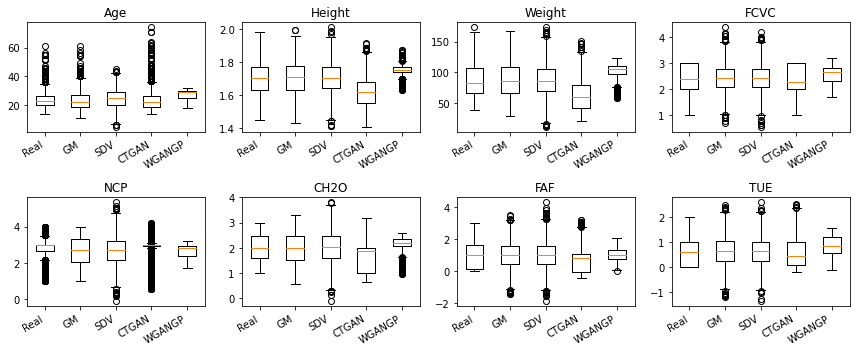

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(12,5))
idx = [[0,0], [0,1], [0,2], [0,3], [1,0], [1,1], [1,2], [1,3]]
idx = dict(zip(columns,idx))

for i in range(0,len(columns)) :
    ax = axs[idx[columns[i]][0], idx[columns[i]][1]]
    ax.boxplot(boxplots_data[columns[i]])
    ax.set_title(columns[i])
    ax.set_xticklabels(DATA_TYPES)

for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")
    
fig.tight_layout()
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/BOXPLOTS.pdf', bbox_inches='tight')

## 6. Frequency distributions comparisson
In this part histograms of each variable are plotted to compare the frequency distributions.

In [20]:
columns = data['Real'].columns
len(columns)

17

In [21]:
hists_data = dict()
for c in columns :
    hists_data[c] = data['Real'][c]
    for name in SYNTHESIZERS :
        hists_data[c] = np.column_stack((hists_data[c], data[name][c]))

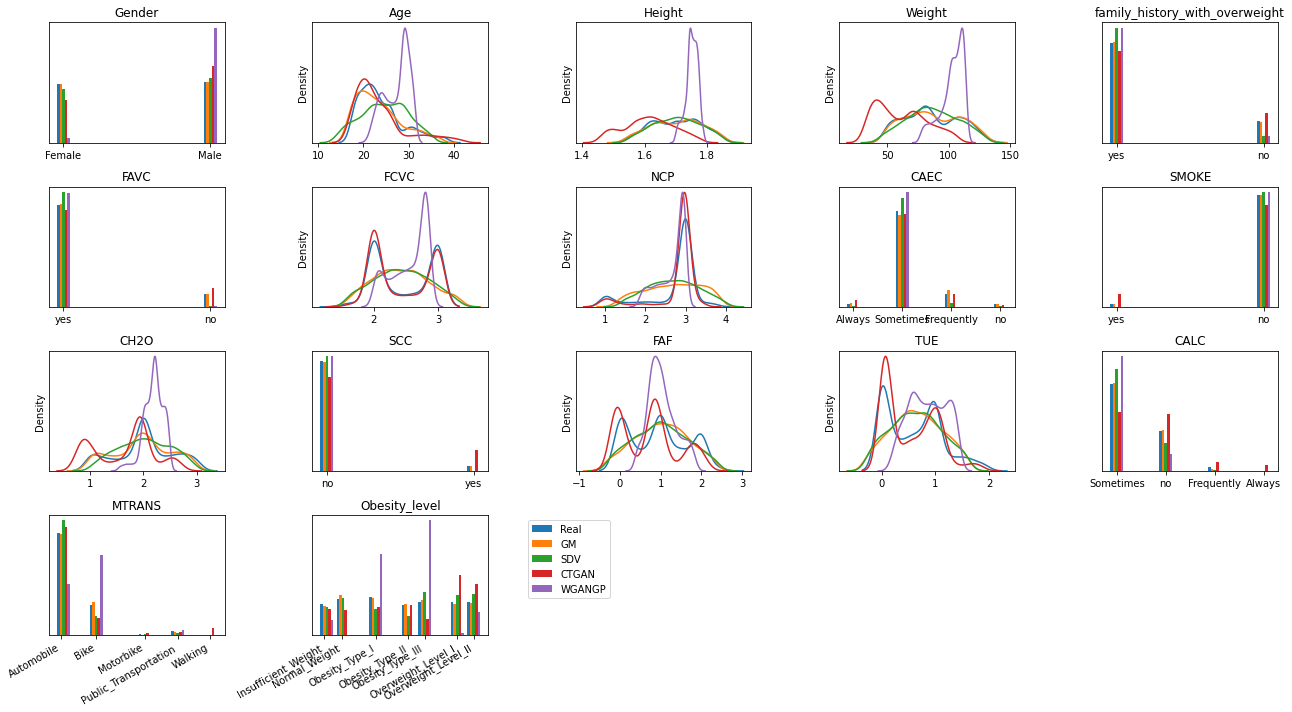

In [22]:
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(18,4*2.5))
idx = {0:[0,0], 1:[0,1], 2:[0,2], 3:[0,3], 4:[0,4], 5:[1,0], 6:[1,1], 7:[1,2], 8:[1,3], 9:[1,4], 10:[2,0], 11:[2,1], 12:[2,2],
      13:[2,3], 14:[2,4], 15:[3,0], 16:[3,1]}

for i in range(0,len(columns)) :
    ax = axs[idx[i][0], idx[i][1]]
    ax.set_title(columns[i])
        
    if i in [1,2,3,6,7,10,12,13] :
        arr = hists_data[columns[i]]
        for col in range(arr.shape[1]) :
            arr_col = np.sort(arr[:,col])
            sns.distplot(arr_col[int(0.05*len(arr_col)) : int(0.95 * len(arr_col))], hist=False, norm_hist=False, ax=ax)
    else :
        ax.hist(hists_data[columns[i]], density=False, histtype='bar', label=DATA_TYPES, align='mid')
        
    if columns[i] in ['Gender','family_history_with_overweight','FAVC','SMOKE','SCC'] :
        ax.set_xticks([0.05, 0.95])
        
    elif columns[i] in ['CAEC','CALC'] :
        ax.set_xticks([0.15, 1.05, 1.95, 2.85])
        
    elif columns[i] == 'MTRANS' :
        ax.set_xticks([0.15, 1, 2.2, 3, 3.8])
        ax.set_xticklabels(data['Real']['MTRANS'].cat.categories.tolist(), rotation = 30, ha="right")
        
    elif columns[i] == 'Obesity_level' :
        ax.set_xticks([0.2, 0.85, 2.1, 3.3, 3.9, 5.1, 5.7])
        ax.set_xticklabels(data['Real']['Obesity_level'].cat.categories.tolist(), rotation = 30, ha="right")
        
    ax.set_yticks([])
    
fig.delaxes(axs[3,2])
fig.delaxes(axs[3,3])
fig.delaxes(axs[3,4])    
fig.tight_layout()
axs.ravel()[16].legend(bbox_to_anchor=(1.2,1),bbox_transform=axs.ravel()[16].transAxes)
fig.savefig('UNIVARIATE RESEMBLANCE RESULTS/HISTOGRAMS.svg', bbox_inches='tight')